In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("teams5sb.csv", index_col=[0,1])
df.columns=[x.lower() for x in df.columns]

In [52]:
# bramkarz-obrona-pomoc-atak-trener
# (PSxG-GA)/SoT; opp_xG; xG; Gls/xG
# ; SoTA; SCA; ;
bramkarz=['psxg','ga','sot']
obrona=['opp_xg','sota']
pomoc=['xg','sca']
atak=['gls','xg']
trener=['opp_xg'] #'opp_xg' vs AVGopp_xg

taktyka =['dist','cpa','1/3','prgp' ,'prgc','90s']# Dist(shot) C1/3 CPA
offence=['def pen','def 3rd','mid 3rd','att 3rd','att pen','touches'] #Touches[Def3rd Mid3rd Att3rd]/Touches
intensity=['touches']
wings=['sw','crs','att','opp_ti','xa'] #/Poss Sw Crs Take-Ons[Att]'opp_ti' xA/PPA
speed=['poss','prgdist'] #PrgP/Poss poss/prgdist
stalefragmenty =['dead','fk','ti','ck', 'gca passdead'] #/Poss Dead,FK,TI,CK GCA pass dead
press=['sca def','tackles def 3rd', 'tackles mid 3rd', 'tackles att 3rd','tackles tkl','fls','won','opp_rec','opp_total cmp','opp_total att','recov']
# SCA_Def,Tackles[Def3rd Mid3rd Att3rd], *oppRec, Fls AWon 
where=['tackles def 3rd','tackles mid 3rd','tackles att 3rd','def 3rd','mid 3rd','att 3rd','att pen','def pen']
error=['challenges lost','tackles tklw','tackles tkl','err','mis','dis','crdy','og','lost']
# ChallengesLost TklW/TklAtt Err Mis Dis CrdY OG Alost
succ=['int','tackles tklw','succ','challenges tkl','blocks','opp_total att','recov'] #Int TklW ChaTkl Take-Ons[Att] blocks 'opp_total att'
pas=['total att','short att','medium att','long att','crspa']
subset=bramkarz+obrona+pomoc+atak+trener+taktyka+offence+intensity+wings+speed+stalefragmenty+press+error+where+pas
subset=list(set(subset))



In [62]:
df


players_used  mp  starts   min  90s  ga  ga90  sota  \
1819 Arsenal                     2  38      38  3420   38  51  1.34   182   
     Bournemouth                 3  38      38  3420   38  70  1.84   173   
     Brighton                    2  38      38  3420   38  60  1.58   170   
     Burnley                     2  38      38  3420   38  68  1.79   199   
     Cardiff City                1  38      38  3420   38  69  1.82   207   
...                            ...  ..     ...   ...  ...  ..   ...   ...   
2223 Nott'ham Forest             3  38      38  3420   38  68  1.79   182   
     Southampton                 2  38      38  3420   38  73  1.92   150   
     Tottenham                   2  38      38  3420   38  63  1.66   172   
     West Ham                    2  38      38  3420   38  55  1.45   170   
     Wolves                      2  38      38  3420   38  58  1.53   174   

                      saves  save%  ...  opp_prgdist  opp_prgc  opp_1/3  \
1819 Arsenal            132   75.8  ...        30164       683      495   
     Bournemouth        106   62.4  ...        37072       741      582   
     Brighton           110   70.6  ...        45177       845      676   
     Burnley            134   66.8  ...        42340       917      592   
     Cardiff City       135   68.6  ...        44834       872      646   
...                     ...    ...  ...          ...       ...      ...   
2223 Nott'ham Forest    112   65.9  ...        47243       813      585   
     Southampton         81   52.7  ...        35355       652      446   
     Tottenham          109   65.1  ...        33624       685      524   
     West Ham           115   70.0  ...        44739       805      612   
     Wolves             115   67.8  ...        35818       702      495   

                      opp_cpa  opp_mis  opp_dis  opp_rec  opp_prgr     qppdac  \
1819 Arsenal              184      551      380    12212      1265   9.629891   
     Bournemouth          203      551      309    15971      1652  13.791813   
     Brighton             196      548      415    17547      1815  14.138595   
     Burnley              247      548      347    16502      1710  12.950480   
     Cardiff City         232      631      414    17425      1711  13.971040   
...                       ...      ...      ...      ...       ...        ...   
2223 Nott'ham Forest      216      557      363    18267      1880  15.260850   
     Southampton          221      590      417    16240      1717  12.772983   
     Tottenham            212      541      344    15945      1497  13.559556   
     West Ham             222      568      338    18736      1709  15.440216   
     Wolves               218      570      375    14439      1575  12.113804   

                           tls  
1819 Arsenal          0.399015  
     Bournemouth      0.430476  
     Brighton         0.424153  
     Burnley          0.467466  
     Cardiff City     0.427481  
...                        ...  
2223 Nott'ham Forest  0.412747  
     Southampton      0.402525  
     Tottenham        0.429725  
     West Ham         0.448105  
     Wolves           0.440242  

[100 rows x 229 columns]

In [355]:
mets=pd.DataFrame()
# QUALITY
mets['goalie']=(df['psxg']-df['ga'])/df['sota']
mets['defs']=df['opp_xg']*-1
mets['mids']=df['xg']
mets['atks']=df['gls']-df['xg']

#STYLE - nie jakosci tylko ilosci lub%
mets['offdeff']=(0.53*(df['att 3rd']/df['touches'])+0.32*(df['mid 3rd']/df['touches'])-0.065*(df['def 3rd']/df['touches'])) 
mets['intensity']=df['touches']
# mets['passes']=df['total att']
mets['dirspeed']=df['poss']/df['prgdist']
mets['deads']=df['dead']/df['live']
# deadfocus=df['dead']
# mets['deads']=df['gca passdead']/df['dead']
mets['press']=(8.1402+df['tackles att 3rd']*-0.020121+df['tackles mid 3rd']*-0.013577+df['opp_rec']*0.004508+df['opp_total cmp']*-0.002475+df['opp_total att']*-0.001121)*-1
mets['contra']=(df['def 3rd']/df['touches'])*df['sot']

mets['buildup']=(0.53*(df['short att']/df['total att'])+0.32*(df['medium att']/df['total att'])-0.065*(df['long att']/df['total att'])) 
mets['progress']=df['prgp']/df['total cmp']
mets['carr']=df['prgc']/df['prgp']
mets['wings']=(df['sw']+df['crs']+df['att'])/df['poss']
mets['agresive']=(df['challenges tkl']/df['challenges att'])+(df['blocks']/df['opp_total att'])+(df['int']/df['opp_total att'])

#ERR/SUCC
mets['deferror']=(0.57*df['challenges lost']+0.86*df['err']+0.29*df['mis']+0.43*df['dis']+0.71*df['crdy']+1.00*df['og']+0.14*df['lost'])*(1-(df['tackles tklw']/df['tackles tkl']))
mets['offsucc']=df['succ']/df['att']+df['gls']/df['sot']+df['won']/(df['won']+df['lost'])+df['recov']/(df['90s']*55)


quality=['defs','atks','mids','goalie',]

style=[
'agresive',
'offdeff',
'press',
'intensity',
'buildup',
'progress',
'contra',
'carr',
'deads',
'dirspeed',
'wings',
]

es=['deferror','offsucc']


In [356]:
teamsA=['Arsenal','Tottenham','Manchester City','Chelsea']
teamsB=['Newcastle Utd','Manchester Utd','Liverpool']
teamsC=['Bournemouth','Southampton','West Ham' ]
teamsD=['Leicester City', 'Everton', 'Brentford', 'Leeds United']


tall=[
'Manchester City','Chelsea','Arsenal','Manchester Utd','Brighton','Liverpool',
'Tottenham','Leicester City','Wolves',
'Newcastle Utd','Leeds United','Brentford',
'West Ham','Fulham','Aston Villa',
'Bournemouth','Everton','Southampton','Crystal Palace',"Nott'ham Forest",
]

In [357]:
error=['challenges lost','tackles tklw','tackles tkl','err','mis','dis','crdy','og','lost']
error2=['challenges lost','err','mis','dis','crdy','og','lost']
# ChallengesLost TklW/TklAtt Err Mis Dis CrdY OG Alost
succ=['int','challenges tkl','blocks','recov'] 
#Int TklW ChaTkl Take-Ons[Att] blocks 'opp_total att'

df['tls']=(1-(df['tackles tklw']/df['tackles tkl']))

df[error2].max()


challenges lost     478
err                  28
mis                 721
dis                 486
crdy                101
og                    6
lost               1025
dtype: int64

In [358]:
coefs=round(1/(df[error2].quantile(0.95)/38),3)
coefs

challenges lost    0.085
err                1.517
mis                0.058
dis                0.083
crdy               0.452
og                 9.500
lost               0.043
Name: 0.95, dtype: float64

In [359]:
round(coefs.rank(pct=1),2)

challenges lost    0.57
err                0.86
mis                0.29
dis                0.43
crdy               0.71
og                 1.00
lost               0.14
Name: 0.95, dtype: float64

In [360]:
ranked=mets.loc[2223].rank(pct=1)
ranked


,goalie,defs,mids,atks,offdeff,intensity,dirspeed,deads,press,contra,buildup,progress,carr,wings,agresive,deferror,offsucc
Arsenal,0.55,0.900,0.800,0.950,1.00,0.80,0.10,0.10,0.95,0.45,0.85,0.90,0.20,0.15,0.70,0.15,0.85
Aston Villa,0.60,0.525,0.550,0.750,0.25,0.35,0.55,0.70,0.60,0.70,0.60,0.30,0.95,0.30,0.55,0.95,0.05
Bournemouth,0.35,0.200,0.150,0.575,0.10,0.15,0.50,0.90,0.05,0.50,0.30,0.05,0.85,0.90,0.05,0.70,0.15
Brentford,0.85,0.750,0.650,0.800,0.35,0.10,1.00,0.85,0.45,0.75,0.10,0.80,0.05,0.65,0.10,0.80,0.70
Brighton,0.10,0.700,0.950,0.350,0.80,0.85,0.25,0.20,0.90,0.90,0.90,0.70,0.30,0.20,0.50,0.50,0.75
Chelsea,0.75,0.525,0.500,0.100,0.75,0.90,0.15,0.25,0.85,0.40,0.95,0.35,0.65,0.40,0.90,0.45,0.30
Crystal Palace,0.50,0.850,0.225,0.700,0.40,0.45,0.80,0.75,0.35,0.35,0.40,0.55,0.45,0.80,1.00,0.60,0.40
Everton,0.90,0.100,0.300,0.050,0.50,0.20,0.75,0.80,0.25,0.60,0.15,0.20,0.55,0.95,0.80,0.30,0.10
Fulham,0.95,0.250,0.350,0.850,0.60,0.55,0.30,0.60,0.55,0.25,0.20,0.60,0.80,0.60,0.95,0.85,0.60
Leeds United,0.15,0.050,0.400,0.450,0.70,0.40,0.95,0.95,0.80,0.15,0.55,0.95,0.15,0.45,0.45,1.00,0.50


In [377]:
# ranked.to_csv('ranked_mets_22223.csv')

<Axes: >

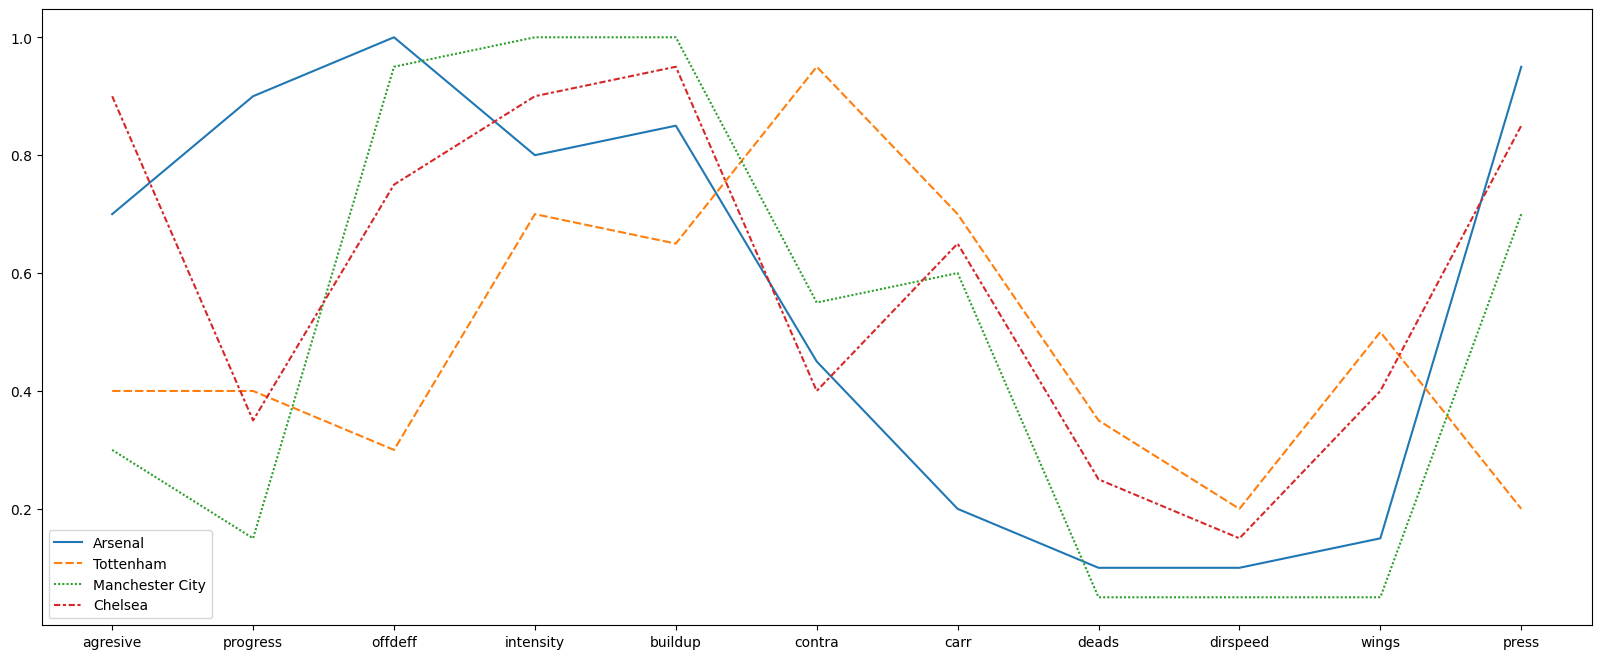

In [361]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=ranked[style].transpose()[teamsA],estimator=None)

In [362]:

data=ranked.reset_index()

data=pd.melt(data, id_vars=data.columns[0], value_vars=data.columns[1:])

data1=data[data['index'].isin(teamsA)]
data2=data[data['variable'].isin(['goalie','defs','mids','atks'])]
data1

,index,variable,value
0,Arsenal,goalie,0.55
5,Chelsea,goalie,0.75
12,Manchester City,goalie,0.45
17,Tottenham,goalie,0.25
20,Arsenal,defs,0.90
...,...,...,...
317,Tottenham,deferror,0.65
320,Arsenal,offsucc,0.85
325,Chelsea,offsucc,0.30
332,Manchester City,offsucc,0.95


<Axes: xlabel='variable', ylabel='value'>

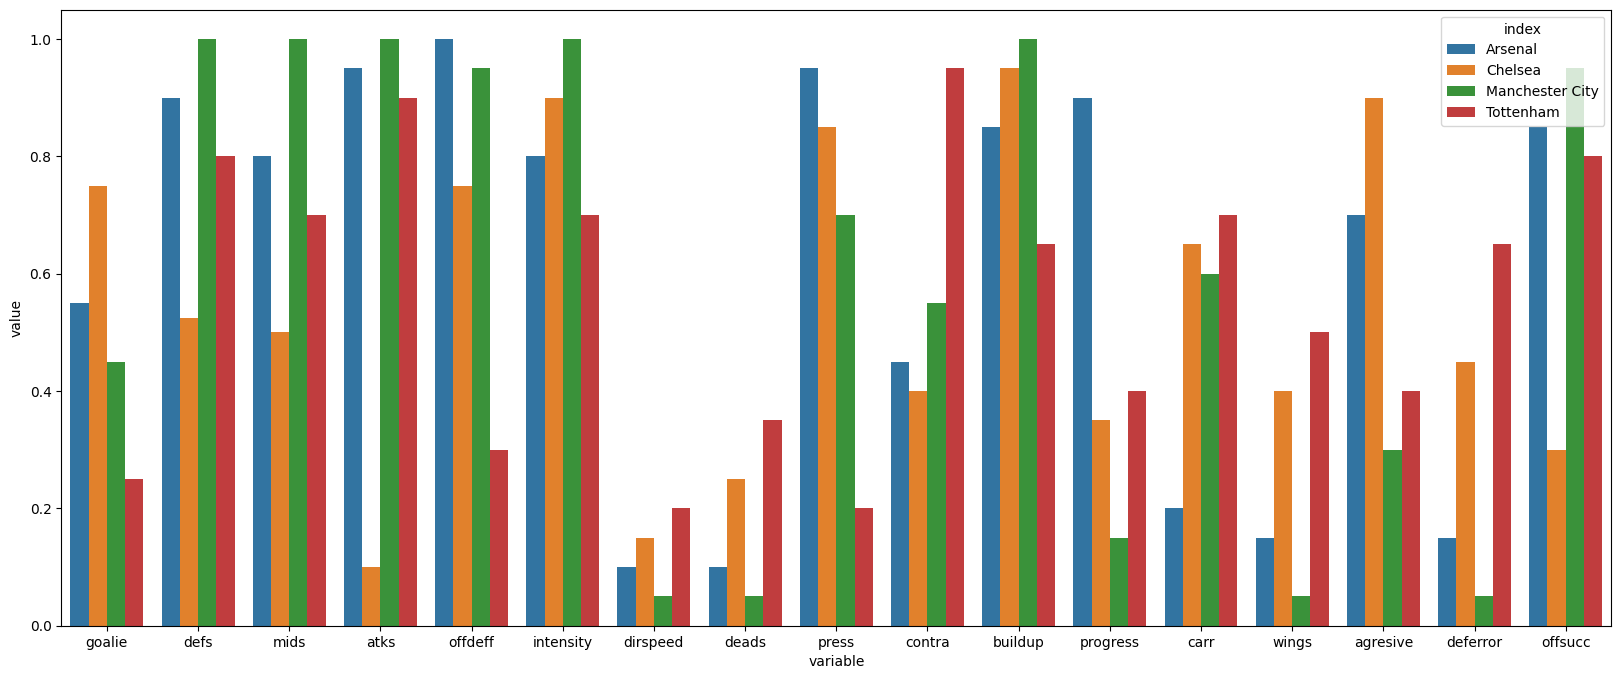

In [363]:
fig = plt.subplots(figsize=(20, 8))
sns.barplot(data=data1,x='variable',y='value',hue='index')

<Axes: xlabel='variable', ylabel='value'>

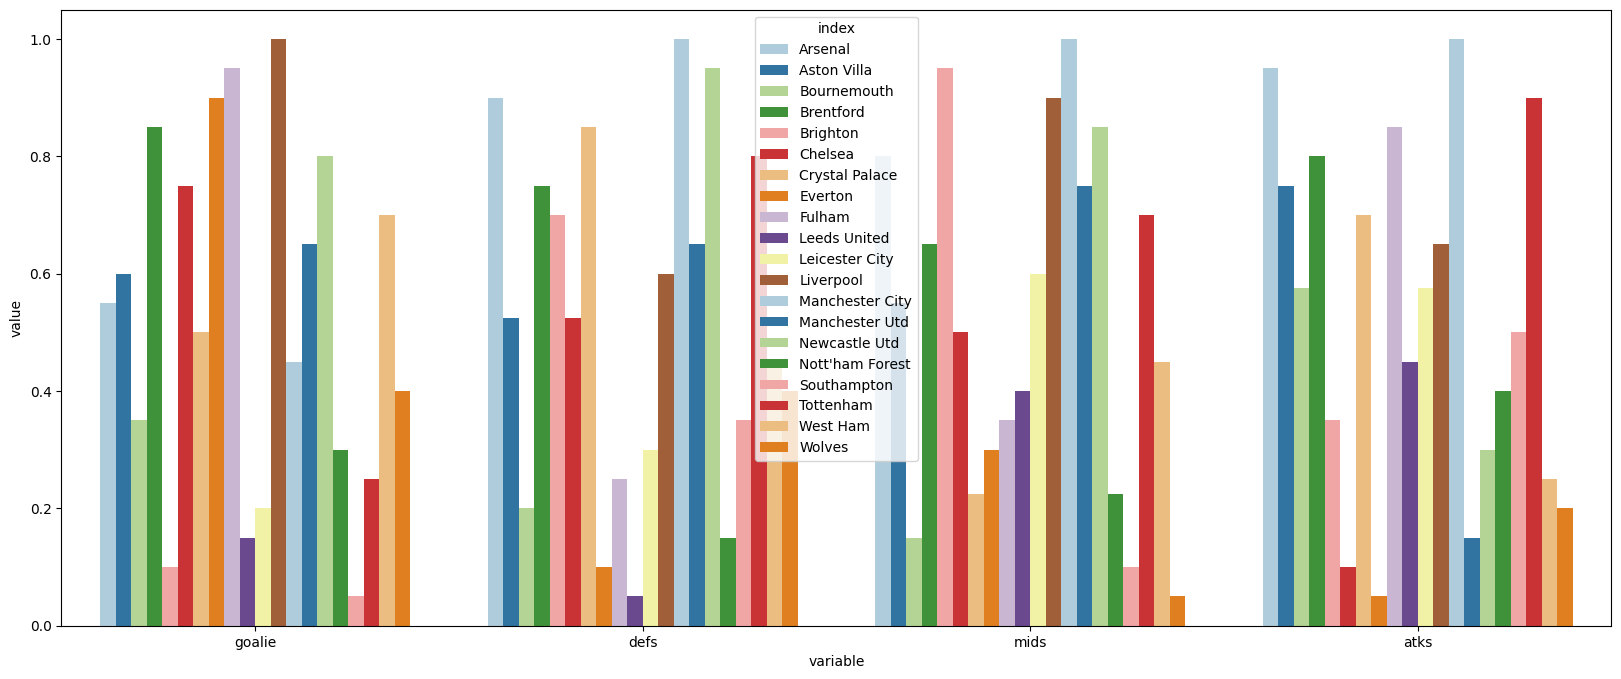

In [364]:
fig = plt.subplots(figsize=(20, 8))
sns.barplot(data=data2,x='variable',y='value',hue='index',palette="Paired")

In [365]:
data=ranked.reset_index()

data=pd.melt(data, id_vars=data.columns[0], value_vars=data.columns[1:])
data=data[data['index'].isin(teamsD)]


<Axes: xlabel='variable', ylabel='value'>

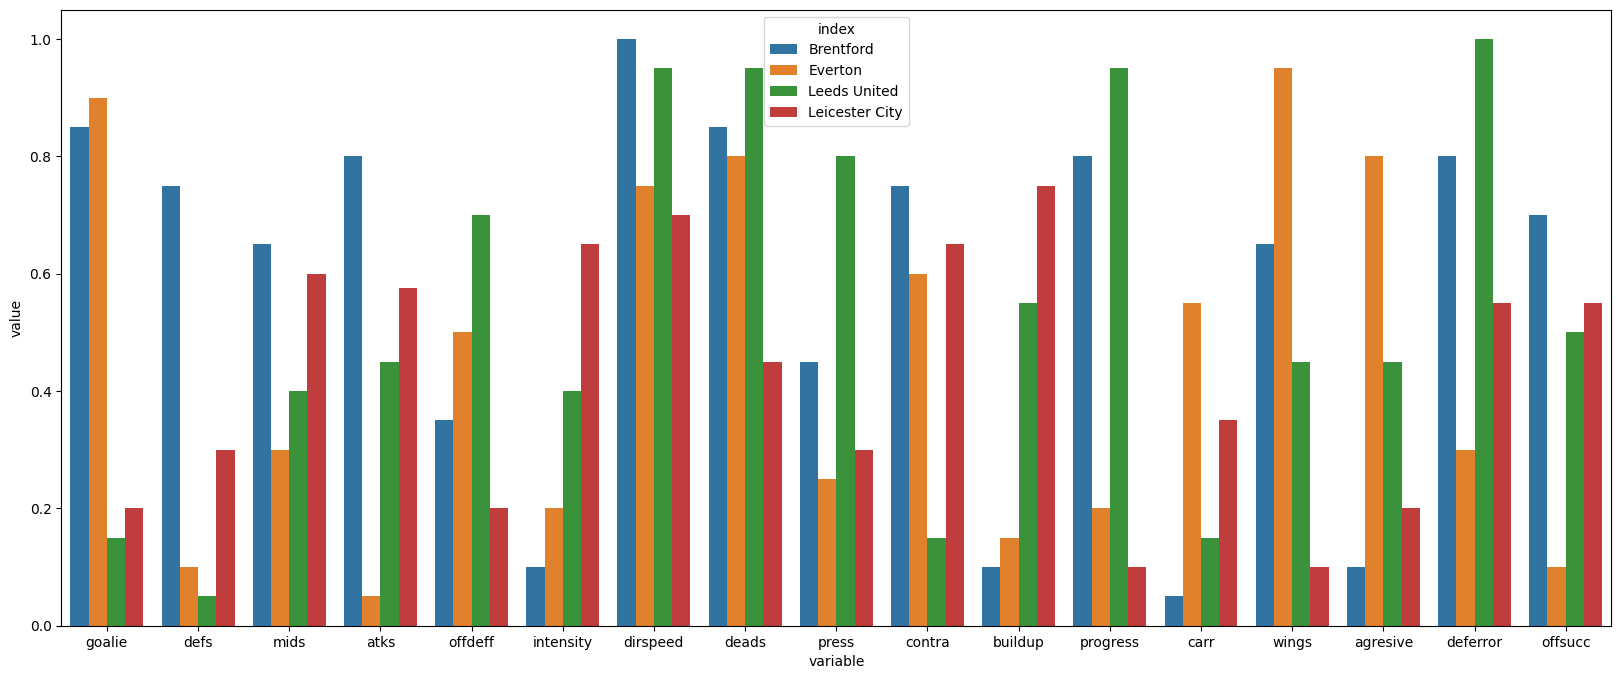

In [366]:
fig = plt.subplots(figsize=(20, 8))
sns.barplot(data=data,x='variable',y='value',hue='index')

In [367]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def to_polar(df,team,cols):
    df1=df.loc[team][cols].to_frame().reset_index()
    df1.columns=['theta','r']
    name=team
    tr=go.Scatterpolar(r=df1.r, theta=df1.theta,fill='toself',name=name)
    return name,df1,tr

n1,df1,tr1=to_polar(ranked,'Arsenal',style)
n2,df2,tr2=to_polar(ranked,'Chelsea',style)


In [368]:
fig = go.Figure()
for team in teamsA[:2]:
    fig.add_trace(to_polar(ranked,team,style)[2])

fig.update_layout(polar={'radialaxis':{'visible':False}},showlegend=True)
fig.show()

In [376]:
import math
sel=tall
colnum=3
rnum=math.ceil(len(sel)/colnum)
fig = make_subplots(rows=rnum, cols=colnum, specs=[[{'type': 'polar'}]*colnum]*rnum)

for i,team in enumerate(sel,1):
    rr=math.ceil(i/colnum)
    cc=i%colnum if i%colnum!=0 else colnum
    fig.add_trace(to_polar(ranked,team,style)[2],rr,cc)

fig.update_layout(polar={'radialaxis':{'visible':False}},showlegend=True)
fig.update_layout(
    autosize=False,
    width=800,
    height=1100,
)
fig.show()